In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

# Load the Online Retail dataset
delivery_path = "/content/drive/My Drive/Colab Notebooks/IPLPrediction/deliveries.csv"
matches_path = "/content/drive/My Drive/Colab Notebooks/IPLPrediction/matches.csv"
delivery_df = pd.read_csv(delivery_path)
matches_df = pd.read_csv(matches_path)
delivery_df.head()


,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [3]:
matches_df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [4]:
print("Deliveries Shape:", delivery_df.shape)
print("Matches Shape:", matches_df.shape)


Deliveries Shape: (260920, 17)
Matches Shape: (1095, 20)


**Exploratory Data Analysis**

<ipython-input-5-95907f96a132>:27: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


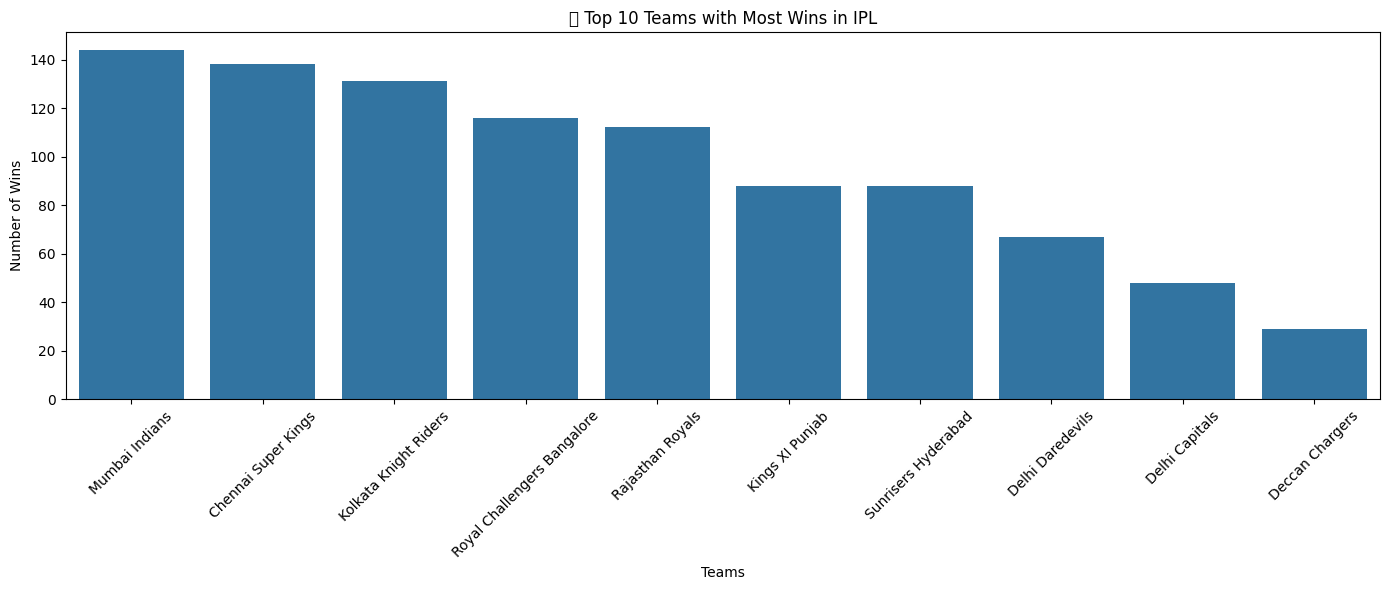

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert date column to datetime
matches_df['date'] = pd.to_datetime(matches_df['date'])

# Extract year from date for consistency
matches_df['year'] = matches_df['date'].dt.year

# Top teams with most wins
top_teams = matches_df['winner'].value_counts().head(10)

# Toss decision impact
toss_decision_result = matches_df.groupby(['toss_decision', 'winner']).size().unstack(fill_value=0)

# Matches per city
matches_per_city = matches_df['city'].value_counts().head(10)

#Top 10 Teams with Most Wins
# Visualizations
plt.figure(figsize=(14, 6))
sns.barplot(x=top_teams.index, y=top_teams.values)
plt.title("🏆 Top 10 Teams with Most Wins in IPL")
plt.ylabel("Number of Wins")
plt.xlabel("Teams")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-6-68d8d822897c>:7: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129504 (\N{BRAIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


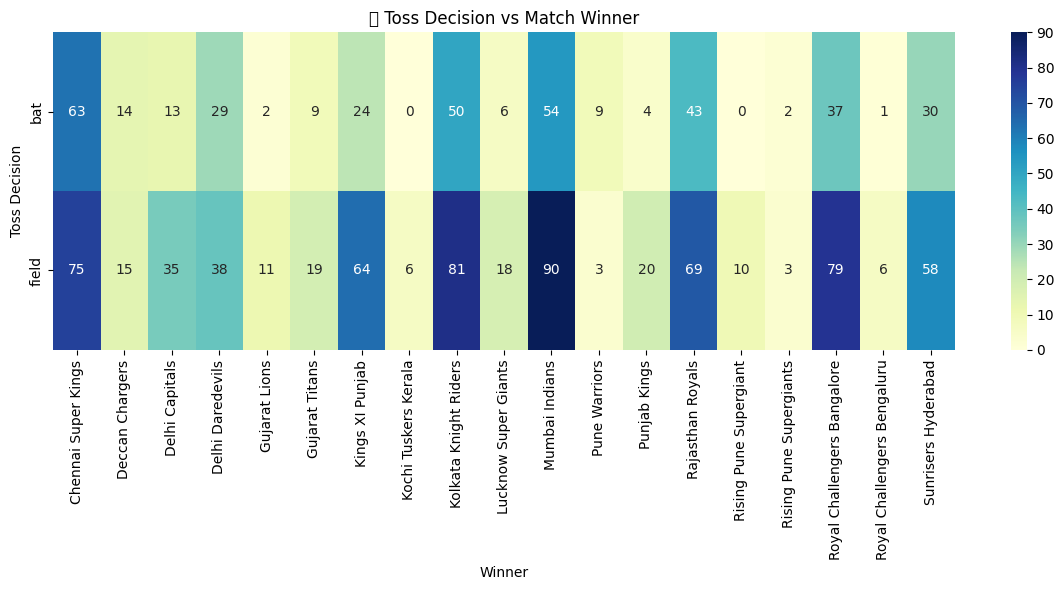

In [6]:
#Toss Decision vs Match Winner (Heatmap)
plt.figure(figsize=(12, 6))
sns.heatmap(toss_decision_result, annot=True, fmt='d', cmap="YlGnBu")
plt.title("🧠 Toss Decision vs Match Winner")
plt.ylabel("Toss Decision")
plt.xlabel("Winner")
plt.tight_layout()
plt.show()

<ipython-input-7-48de1f42bec4>:8: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128205 (\N{ROUND PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


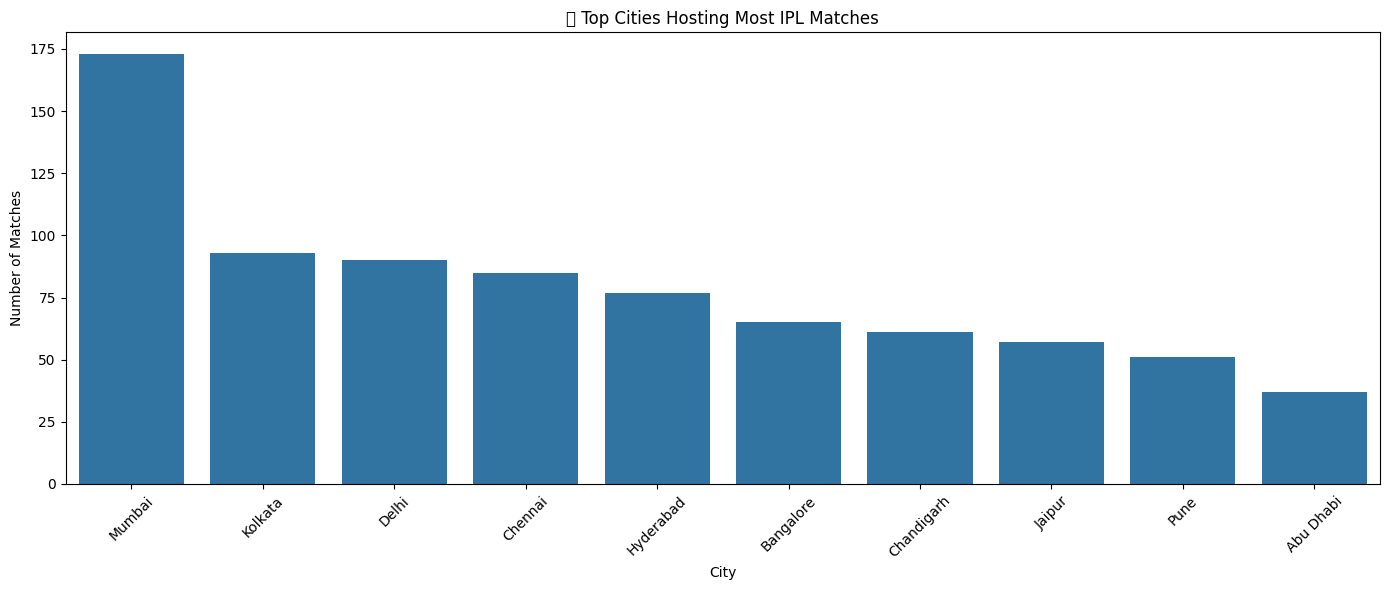

In [7]:
#Top Cities Hosting Most IPL Matches
plt.figure(figsize=(14, 6))
sns.barplot(x=matches_per_city.index, y=matches_per_city.values)
plt.title("📍 Top Cities Hosting Most IPL Matches")
plt.ylabel("Number of Matches")
plt.xlabel("City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-8-0565b9002b24>:24: UserWarning: Glyph 127951 (\N{CRICKET BAT AND BALL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127951 (\N{CRICKET BAT AND BALL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


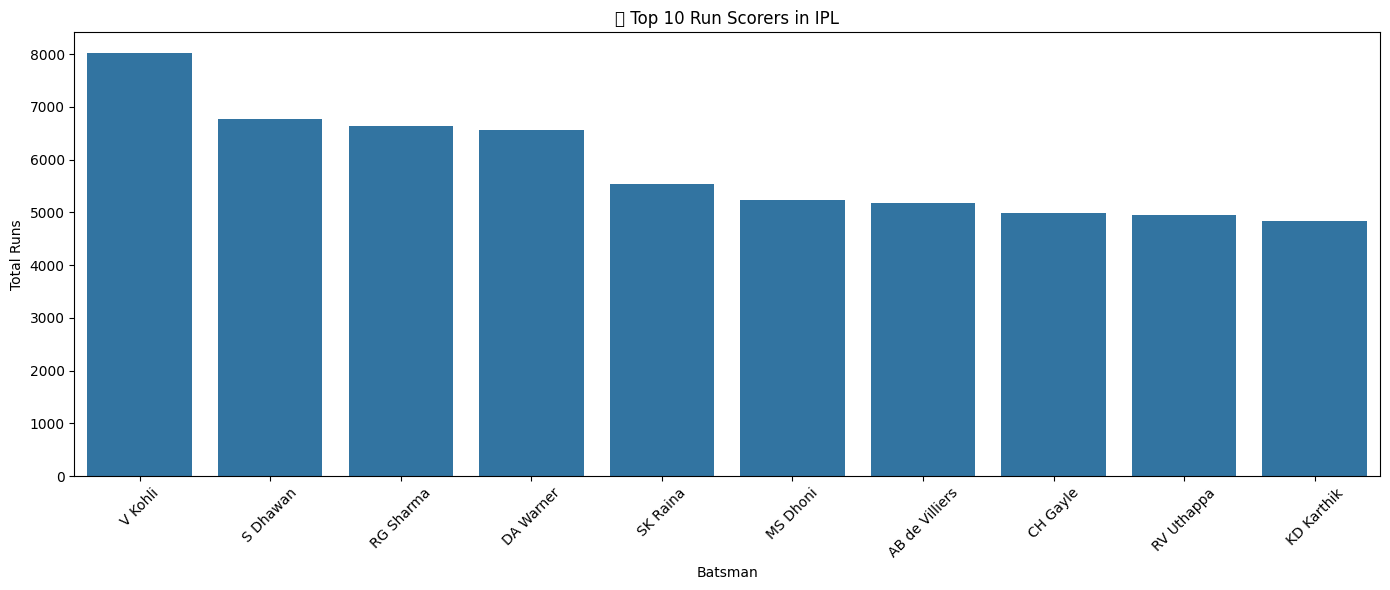

In [8]:
#Top 10 Run Scorers In IPL
# Top 10 Run Scorers
top_batsmen = delivery_df.groupby('batter')['batsman_runs'].sum().sort_values(ascending=False).head(10)

# Top 10 Wicket Takers (excluding non-dismissals)
wicket_kinds = [
    'caught', 'bowled', 'lbw', 'stumped', 'caught and bowled', 'hit wicket'
]
top_bowlers = (
    delivery_df[delivery_df['dismissal_kind'].isin(wicket_kinds)]
    .groupby('bowler')['dismissal_kind']
    .count()
    .sort_values(ascending=False)
    .head(10)
)

# Plot Top 10 Run Scorers
plt.figure(figsize=(14, 6))
sns.barplot(x=top_batsmen.index, y=top_batsmen.values)
plt.title("🏏 Top 10 Run Scorers in IPL")
plt.ylabel("Total Runs")
plt.xlabel("Batsman")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<ipython-input-9-5994e1a4ea8a>:9: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


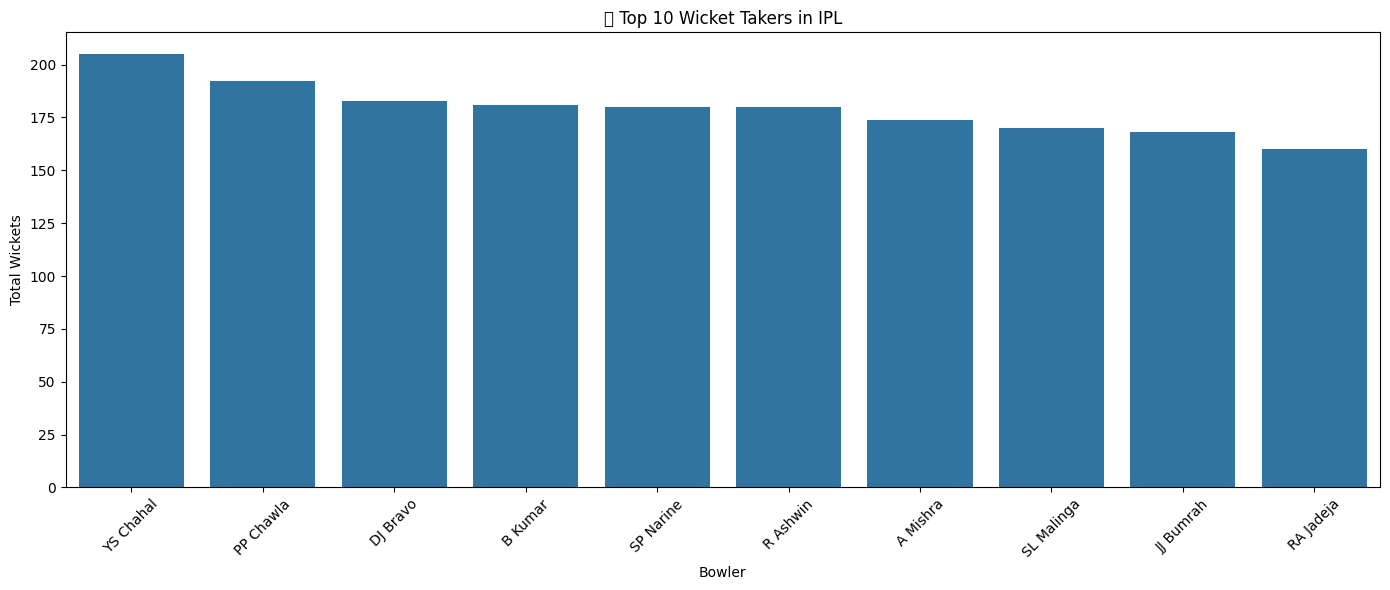

In [9]:
#Top 10 Wicket Takers In IPL
# Plot Top 10 Wicket Takers
plt.figure(figsize=(14, 6))
sns.barplot(x=top_bowlers.index, y=top_bowlers.values)
plt.title("🎯 Top 10 Wicket Takers in IPL")
plt.ylabel("Total Wickets")
plt.xlabel("Bowler")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-10-634ca0d2d096>:32: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


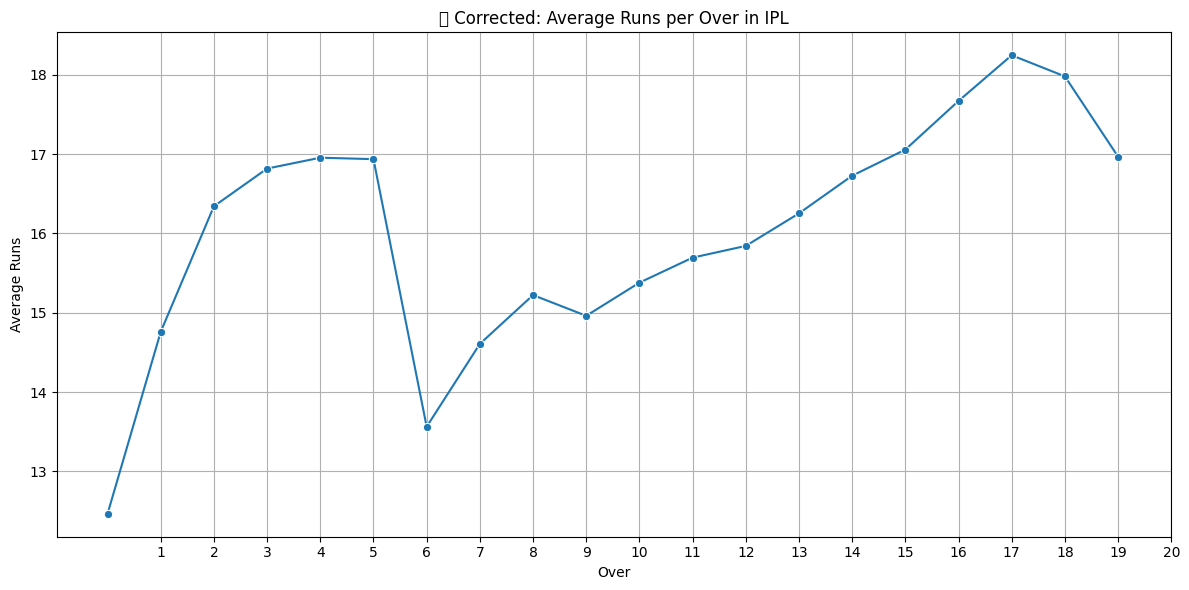

In [10]:
# Calculate average runs per over per match
runs_per_over = (
    delivery_df.groupby(['match_id', 'over'])['total_runs']
    .sum()
    .reset_index()
)

# Now calculate the average across all matches per over
avg_runs_per_over = runs_per_over.groupby('over')['total_runs'].mean().reset_index()
avg_runs_per_over.rename(columns={'total_runs': 'average_runs'}, inplace=True)

# Calculate total wickets per over per match
wickets_per_ball = delivery_df[delivery_df['is_wicket'] == 1]
wickets_per_over = (
    wickets_per_ball.groupby(['match_id', 'over'])['is_wicket']
    .sum()
    .reset_index()
)

# Average wickets per over
avg_wickets_per_over = wickets_per_over.groupby('over')['is_wicket'].mean().reset_index()
avg_wickets_per_over.rename(columns={'is_wicket': 'average_wickets'}, inplace=True)

# Plot corrected average runs per over
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_runs_per_over, x='over', y='average_runs', marker='o')
plt.title("📈 Corrected: Average Runs per Over in IPL")
plt.ylabel("Average Runs")
plt.xlabel("Over")
plt.xticks(range(1, 21))
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-11-5319e6aa7dd2>:9: UserWarning: Glyph 128165 (\N{COLLISION SYMBOL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128165 (\N{COLLISION SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


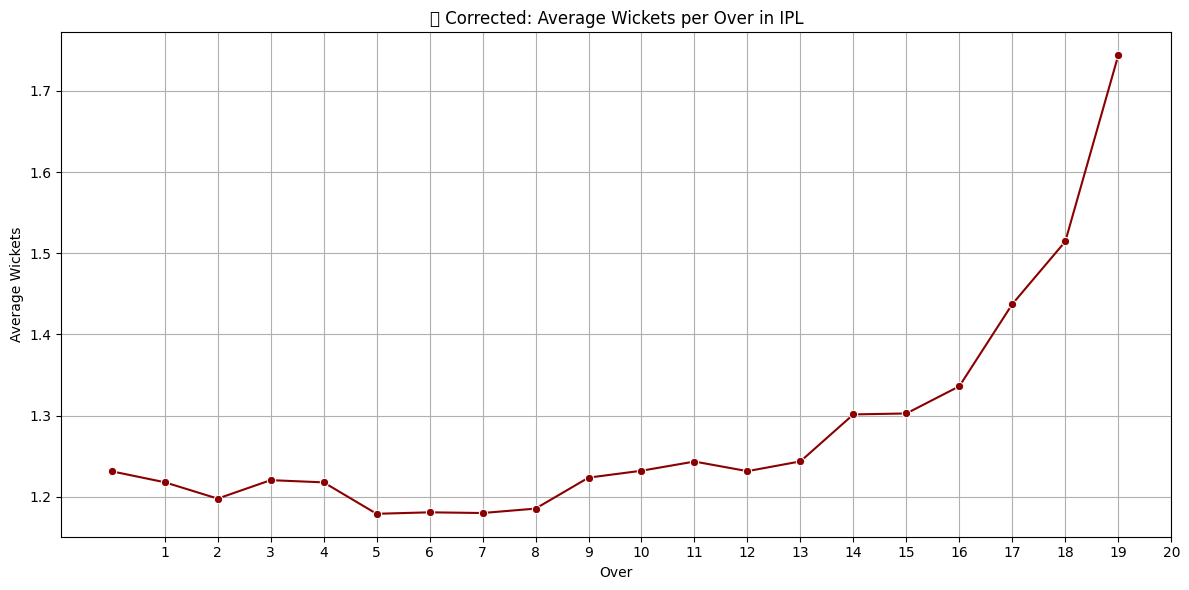

In [11]:

# Plot corrected average wickets per over
plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_wickets_per_over, x='over', y='average_wickets', marker='o', color='darkred')
plt.title("💥 Corrected: Average Wickets per Over in IPL")
plt.ylabel("Average Wickets")
plt.xlabel("Over")
plt.xticks(range(1, 21))
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import xgboost as xgb
from sklearn.preprocessing import StandardScaler


# Prepare match data for ML
ml_df = matches_df.copy()

# Drop rows with missing 'winner'
ml_df = ml_df.dropna(subset=['winner'])

# Select features and target
features = ['team1', 'team2', 'toss_winner', 'toss_decision', 'venue']
target = 'winner'

# Encode categorical variables
encoder = LabelEncoder()
for col in features + [target]:
    ml_df[col] = encoder.fit_transform(ml_df[col])

X = ml_df[features]
y = ml_df[target]

# Then re-split X_scaled into train/test and retrain logistic regression
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train models
log_model = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss')

log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Predict
log_preds = log_model.predict(X_test)
rf_preds = rf_model.predict(X_test)
xgb_preds = xgb_model.predict(X_test)

# Evaluate
log_acc = accuracy_score(y_test, log_preds)
rf_acc = accuracy_score(y_test, rf_preds)
xgb_acc = accuracy_score(y_test, xgb_preds)

(log_acc, rf_acc, xgb_acc)

(0.24311926605504589, 0.47706422018348627, 0.5137614678899083)

<ipython-input-13-34e3b8887b93>:15: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


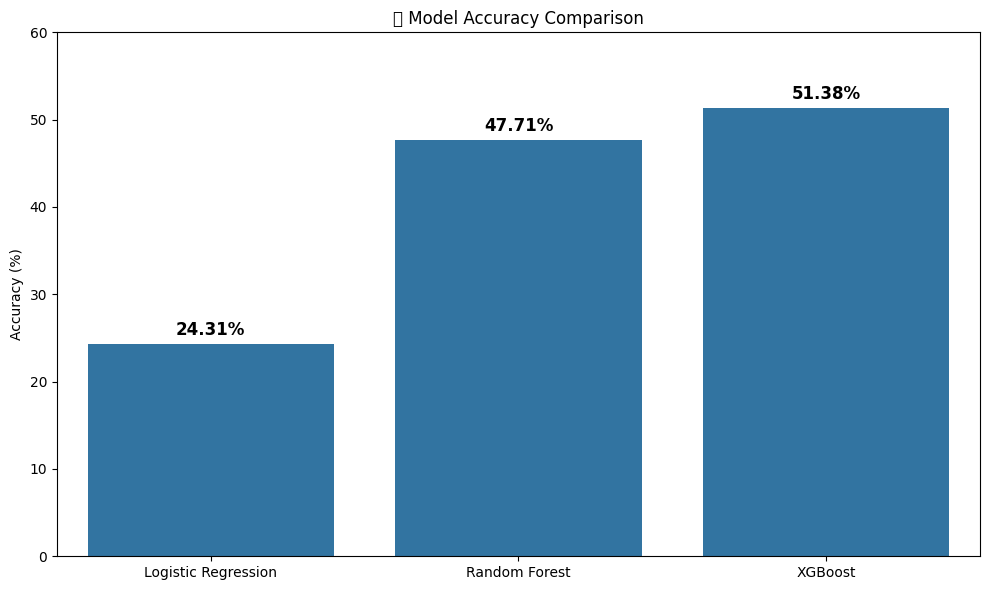

In [13]:
import matplotlib.pyplot as plt

# Model names and accuracies
models = ['Logistic Regression', 'Random Forest', 'XGBoost']
accuracies = [24.31, 47.71, 51.38]

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies)
plt.title("📊 Model Accuracy Comparison")
plt.ylabel("Accuracy (%)")
plt.ylim(0, 60)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 1, f"{acc:.2f}%", ha='center', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

<ipython-input-14-9083779d5b1c>:10: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


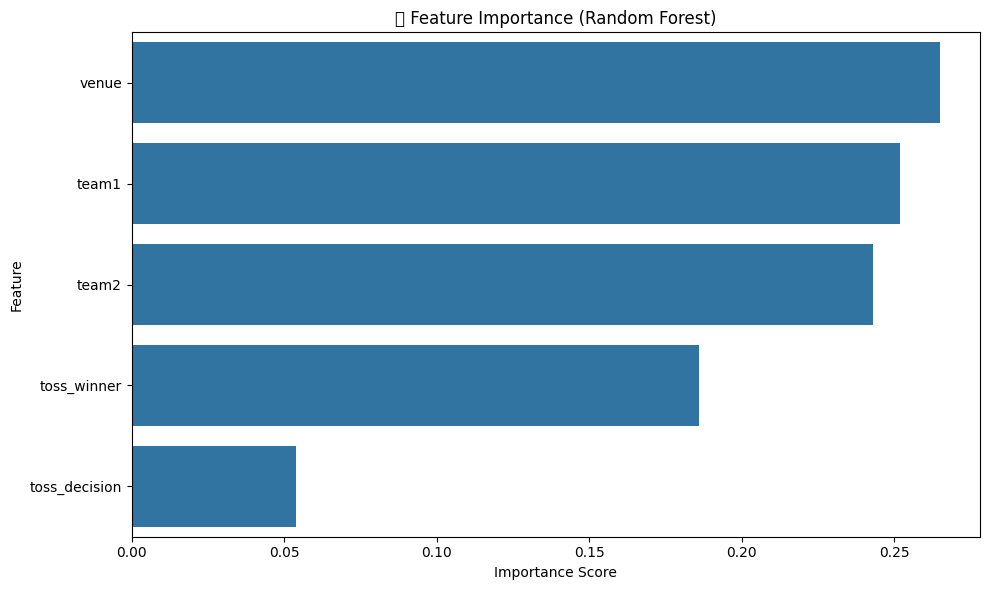

In [14]:
# Get feature importances from the trained Random Forest model
feature_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance.values, y=feature_importance.index)
plt.title("🔍 Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [15]:
# Drop matches without a winner
matches_df = matches_df.dropna(subset=['winner']).copy()

# Create new feature: 'home_team' — if team1 or team2 matches the city (approximation)
def get_home_team(row):
    city = str(row['city']).lower()
    team1 = str(row['team1']).lower()
    team2 = str(row['team2']).lower()

    if city in team1:
        return row['team1']
    elif city in team2:
        return row['team2']
    else:
        return 'Neutral'

matches_df['home_team'] = matches_df.apply(get_home_team, axis=1)

# Create new feature: 'head_to_head_count' — total matches played between team1 and team2 so far
head_to_head = {}
head_to_head_list = []

for i, row in matches_df.iterrows():
    pair = tuple(sorted([row['team1'], row['team2']]))
    count = head_to_head.get(pair, 0)
    head_to_head_list.append(count)
    head_to_head[pair] = count + 1

matches_df['head_to_head_count'] = head_to_head_list

# Show sample with new features
matches_df[['team1', 'team2', 'city', 'home_team', 'head_to_head_count']].head(10)


,team1,team2,city,home_team,head_to_head_count
0,Royal Challengers Bangalore,Kolkata Knight Riders,Bangalore,Royal Challengers Bangalore,0
1,Kings XI Punjab,Chennai Super Kings,Chandigarh,Neutral,0
2,Delhi Daredevils,Rajasthan Royals,Delhi,Delhi Daredevils,0
3,Mumbai Indians,Royal Challengers Bangalore,Mumbai,Mumbai Indians,0
4,Kolkata Knight Riders,Deccan Chargers,Kolkata,Kolkata Knight Riders,0
5,Rajasthan Royals,Kings XI Punjab,Jaipur,Neutral,0
6,Deccan Chargers,Delhi Daredevils,Hyderabad,Neutral,0
7,Chennai Super Kings,Mumbai Indians,Chennai,Chennai Super Kings,0
8,Deccan Chargers,Rajasthan Royals,Hyderabad,Neutral,0
9,Kings XI Punjab,Mumbai Indians,Chandigarh,Neutral,0


In [16]:
matches_df.tail(15)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,...,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,year,home_team,head_to_head_count
1080,1426295,2024,Hyderabad,2024-05-08,League,TM Head,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Lucknow Super Giants,Sunrisers Hyderabad,Lucknow Super Giants,...,10.0,166.0,20.0,N,NaN,MV Saidharshan Kumar,YC Barde,2024,Sunrisers Hyderabad,3
1081,1426296,2024,Dharamsala,2024-05-09,League,V Kohli,"Himachal Pradesh Cricket Association Stadium, ...",Royal Challengers Bengaluru,Punjab Kings,Punjab Kings,...,60.0,242.0,20.0,N,NaN,Nitin Menon,HAS Khalid,2024,Neutral,1
1082,1426297,2024,Ahmedabad,2024-05-10,League,Shubman Gill,"Narendra Modi Stadium, Ahmedabad",Gujarat Titans,Chennai Super Kings,Chennai Super Kings,...,35.0,232.0,20.0,N,NaN,KN Ananthapadmanabhan,NA Patwardhan,2024,Neutral,6
1083,1426298,2024,Kolkata,2024-05-11,League,CV Varun,"Eden Gardens, Kolkata",Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,...,18.0,158.0,16.0,N,NaN,UV Gandhe,Vinod Seshan,2024,Kolkata Knight Riders,33
1084,1426299,2024,Chennai,2024-05-12,League,Simarjeet Singh,"MA Chidambaram Stadium, Chepauk, Chennai",Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,...,5.0,142.0,20.0,N,NaN,R Pandit,YC Barde,2024,Chennai Super Kings,28
1085,1426300,2024,Bengaluru,2024-05-12,League,C Green,"M Chinnaswamy Stadium, Bengaluru",Royal Challengers Bengaluru,Delhi Capitals,Delhi Capitals,...,47.0,188.0,20.0,N,NaN,A Nand Kishore,VA Kulkarni,2024,Royal Challengers Bengaluru,0
1086,1426302,2024,Delhi,2024-05-14,League,I Sharma,"Arun Jaitley Stadium, Delhi",Delhi Capitals,Lucknow Super Giants,Lucknow Super Giants,...,19.0,209.0,20.0,N,NaN,A Totre,Vinod Seshan,2024,Delhi Capitals,4
1087,1426303,2024,Guwahati,2024-05-15,League,SM Curran,"Barsapara Cricket Stadium, Guwahati",Rajasthan Royals,Punjab Kings,Rajasthan Royals,...,5.0,145.0,20.0,N,NaN,R Pandit,MV Saidharshan Kumar,2024,Neutral,6
1088,1426305,2024,Mumbai,2024-05-17,League,N Pooran,"Wankhede Stadium, Mumbai",Lucknow Super Giants,Mumbai Indians,Mumbai Indians,...,18.0,215.0,20.0,N,NaN,Navdeep Singh,R Pandit,2024,Mumbai Indians,5
1089,1426306,2024,Bengaluru,2024-05-18,League,F du Plessis,"M Chinnaswamy Stadium, Bengaluru",Royal Challengers Bengaluru,Chennai Super Kings,Chennai Super Kings,...,27.0,219.0,20.0,N,NaN,A Totre,KN Ananthapadmanabhan,2024,Royal Challengers Bengaluru,1


In [17]:
#Add home_team and head_to_head_count to ML Model
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Drop matches without a winner
ml_df = matches_df.dropna(subset=['winner']).copy()

# Select features including the new ones
features = ['team1', 'team2', 'toss_winner', 'toss_decision', 'venue', 'home_team', 'head_to_head_count']
target = 'winner'

# Encode all categorical variables
encoder = LabelEncoder()
for col in ['team1', 'team2', 'toss_winner', 'toss_decision', 'venue', 'home_team', 'winner']:
    ml_df[col] = encoder.fit_transform(ml_df[col])

# Define X and y
X = ml_df[features]
y = ml_df[target]

# Train-test split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train models
log_model = LogisticRegression(max_iter=1000)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Predictions
log_preds = log_model.predict(X_test)
rf_preds = rf_model.predict(X_test)

# Accuracy
log_acc_new = accuracy_score(y_test, log_preds)
rf_acc_new = accuracy_score(y_test, rf_preds)

(log_acc_new, rf_acc_new)

(0.2706422018348624, 0.47706422018348627)

<ipython-input-18-dbf3d81f387b>:22: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


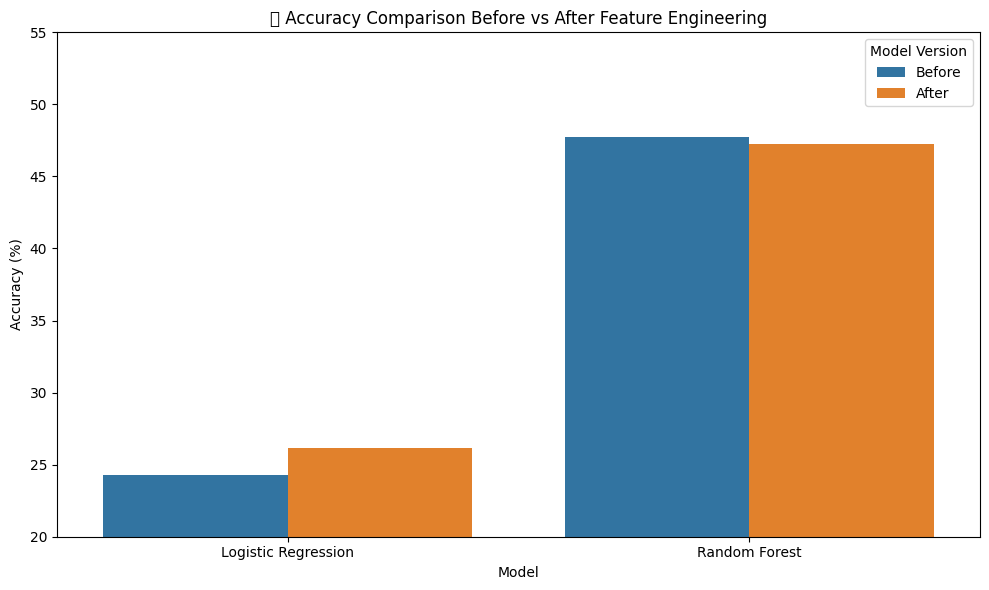

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data for visualization
model_names = ['Logistic Regression', 'Random Forest']
before = [24.31, 47.71]
after = [26.15, 47.25]

df_compare = pd.DataFrame({
    'Model': model_names * 2,
    'Accuracy': before + after,
    'Version': ['Before'] * 2 + ['After'] * 2
})

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=df_compare, x='Model', y='Accuracy', hue='Version')
plt.title("📊 Accuracy Comparison Before vs After Feature Engineering")
plt.ylabel("Accuracy (%)")
plt.ylim(20, 55)
plt.legend(title="Model Version")
plt.tight_layout()
plt.show()

In [19]:
from collections import defaultdict
import numpy as np

# Sort matches by date to ensure form is calculated chronologically
matches_df = matches_df.sort_values(by='date')

# Initialize recent form trackers
team_recent_form = defaultdict(list)
team1_form_list = []
team2_form_list = []

# Iterate and calculate rolling win ratio (last 5 matches)
for _, row in matches_df.iterrows():
    team1 = row['team1']
    team2 = row['team2']
    winner = row['winner']

    # Get recent form: average of last 5 match results (1=win, 0=loss)
    team1_form = np.mean(team_recent_form[team1][-5:]) if team_recent_form[team1] else 0.5
    team2_form = np.mean(team_recent_form[team2][-5:]) if team_recent_form[team2] else 0.5

    team1_form_list.append(team1_form)
    team2_form_list.append(team2_form)

    # Update the tracker
    team_recent_form[team1].append(1 if winner == team1 else 0)
    team_recent_form[team2].append(1 if winner == team2 else 0)

# Add to dataframe
matches_df['team1_recent_form'] = team1_form_list
matches_df['team2_recent_form'] = team2_form_list

# Show sample
matches_df[['team1', 'team2', 'winner', 'team1_recent_form', 'team2_recent_form']].head(10)


,team1,team2,winner,team1_recent_form,team2_recent_form
0,Royal Challengers Bangalore,Kolkata Knight Riders,Kolkata Knight Riders,0.5,0.5
1,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,0.5,0.5
2,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,0.5,0.5
3,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,0.5,0.0
4,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders,1.0,0.5
5,Rajasthan Royals,Kings XI Punjab,Rajasthan Royals,0.0,0.0
6,Deccan Chargers,Delhi Daredevils,Delhi Daredevils,0.0,1.0
7,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,1.0,0.0
8,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,0.0,0.5
9,Kings XI Punjab,Mumbai Indians,Kings XI Punjab,0.0,0.0


In [20]:
# Calculate home win ratio per team dynamically over time
from collections import defaultdict

# Reset the dataframe index for consistency
matches_df = matches_df.sort_values(by='date').reset_index(drop=True)

# Tracker for home games and home wins
home_game_tracker = defaultdict(int)
home_win_tracker = defaultdict(int)
home_win_percent_list = []

# Iterate through matches and compute home win % before each match
for _, row in matches_df.iterrows():
    home_team = row['home_team']
    winner = row['winner']

    if home_team != 'Neutral':
        # Calculate win percentage before this match
        total_home_games = home_game_tracker[home_team]
        total_home_wins = home_win_tracker[home_team]

        win_percent = (total_home_wins / total_home_games) if total_home_games > 0 else 0.5
        home_win_percent_list.append(win_percent)

        # Update trackers after current match
        home_game_tracker[home_team] += 1
        if home_team == winner:
            home_win_tracker[home_team] += 1
    else:
        # For neutral venues, set to neutral value
        home_win_percent_list.append(0.5)

# Add to DataFrame
matches_df['home_win_percent'] = home_win_percent_list

# Show sample
matches_df[['team1', 'team2', 'home_team', 'winner', 'home_win_percent']].head(10)

,team1,team2,home_team,winner,home_win_percent
0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,Kolkata Knight Riders,0.5
1,Kings XI Punjab,Chennai Super Kings,Neutral,Chennai Super Kings,0.5
2,Delhi Daredevils,Rajasthan Royals,Delhi Daredevils,Delhi Daredevils,0.5
3,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,Royal Challengers Bangalore,0.5
4,Kolkata Knight Riders,Deccan Chargers,Kolkata Knight Riders,Kolkata Knight Riders,0.5
5,Rajasthan Royals,Kings XI Punjab,Neutral,Rajasthan Royals,0.5
6,Deccan Chargers,Delhi Daredevils,Neutral,Delhi Daredevils,0.5
7,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,0.5
8,Deccan Chargers,Rajasthan Royals,Neutral,Rajasthan Royals,0.5
9,Kings XI Punjab,Mumbai Indians,Neutral,Kings XI Punjab,0.5


In [21]:
# Prepare title defense indicator based on previous season's winner

# Convert season to numeric (first extract year from "2007/08", etc.)
matches_df['season_year'] = matches_df['season'].str.extract(r'(\d{4})').astype(int)

# Create mapping of year -> previous year winner
season_winner_map = {}

# Sort matches to get one winner per season
season_sorted = matches_df.sort_values(by='date')
for season in sorted(matches_df['season_year'].unique()):
    winner = season_sorted[season_sorted['season_year'] == season]['winner'].mode()
    if not winner.empty:
        season_winner_map[season + 1] = winner.values[0]  # next year's defending champion

# Add title defense indicator for team1 and team2
matches_df['team1_title_defender'] = matches_df.apply(
    lambda row: 1 if row['team1'] == season_winner_map.get(row['season_year'], '') else 0,
    axis=1
)
matches_df['team2_title_defender'] = matches_df.apply(
    lambda row: 1 if row['team2'] == season_winner_map.get(row['season_year'], '') else 0,
    axis=1
)

# Show sample
matches_df[['season', 'season_year', 'team1', 'team2', 'team1_title_defender', 'team2_title_defender']].head(12)


,season,season_year,team1,team2,team1_title_defender,team2_title_defender
0,2007/08,2007,Royal Challengers Bangalore,Kolkata Knight Riders,0,0
1,2007/08,2007,Kings XI Punjab,Chennai Super Kings,0,0
2,2007/08,2007,Delhi Daredevils,Rajasthan Royals,0,0
3,2007/08,2007,Mumbai Indians,Royal Challengers Bangalore,0,0
4,2007/08,2007,Kolkata Knight Riders,Deccan Chargers,0,0
5,2007/08,2007,Rajasthan Royals,Kings XI Punjab,0,0
6,2007/08,2007,Deccan Chargers,Delhi Daredevils,0,0
7,2007/08,2007,Chennai Super Kings,Mumbai Indians,0,0
8,2007/08,2007,Deccan Chargers,Rajasthan Royals,0,0
9,2007/08,2007,Kings XI Punjab,Mumbai Indians,0,0


In [22]:
# Recalculate missing toss-related features before scaling

# Toss winner chose to bat
matches_df['toss_bat'] = matches_df['toss_decision'].apply(lambda x: 1 if x == 'bat' else 0)

# Toss winner also won the match
matches_df['toss_win_match_win'] = (matches_df['toss_winner'] == matches_df['winner']).astype(int)

# Team1 batted first indicator (assumed from toss logic)
matches_df['team1_batted_first'] = matches_df['toss_decision'].apply(lambda x: 1 if x == 'bat' else 0)

# Drop matches without a winner
ml_df = matches_df.dropna(subset=['winner']).copy()

# Encode categorical features
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in ['team1', 'team2', 'toss_winner', 'toss_decision', 'venue', 'home_team', 'winner']:
    ml_df[col] = encoder.fit_transform(ml_df[col])

# Define feature lists
numeric_features = [
    'head_to_head_count', 'team1_recent_form', 'team2_recent_form',
    'home_win_percent', 'toss_bat', 'toss_win_match_win', 'team1_batted_first',
    'team1_title_defender', 'team2_title_defender'
]
categorical_features = ['team1', 'team2', 'toss_winner', 'toss_decision', 'venue', 'home_team']

# Scale numeric features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled_numeric = scaler.fit_transform(ml_df[numeric_features])

# Combine scaled numeric with encoded categorical
X_encoded_categorical = ml_df[categorical_features].values
import numpy as np
X_final = np.hstack([X_encoded_categorical, X_scaled_numeric])
y_final = ml_df['winner']

# Train-test split
from sklearn.model_selection import train_test_split
X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42
)

# Train models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

log_model_final = LogisticRegression(solver='saga', max_iter=3000)
rf_model_final = RandomForestClassifier(n_estimators=100, random_state=42)

log_model_final.fit(X_train_final, y_train_final)
rf_model_final.fit(X_train_final, y_train_final)

# Predict and evaluate
log_preds_final = log_model_final.predict(X_test_final)
rf_preds_final = rf_model_final.predict(X_test_final)

log_acc_final = accuracy_score(y_test_final, log_preds_final)
rf_acc_final = accuracy_score(y_test_final, rf_preds_final)

(log_acc_final, rf_acc_final)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


(0.3165137614678899, 0.6972477064220184)

In [23]:
# Try LightGBM as an alternative to XGBoost
from lightgbm import LGBMClassifier

# Initialize and train LightGBM model
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train_final, y_train_final)

# Predict and evaluate
lgbm_preds = lgbm_model.predict(X_test_final)
lgbm_acc = accuracy_score(y_test_final, lgbm_preds)

lgbm_acc

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000183 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 287
[LightGBM] [Info] Number of data points in the train set: 872, number of used features: 15
[LightGBM] [Info] Start training from score -2.155669
[LightGBM] [Info] Start training from score -3.474953
[LightGBM] [Info] Start training from score -3.057217
[LightGBM] [Info] Start training from score -2.781805
[LightGBM] [Info] Start training from score -4.691348
[LightGBM] [Info] Start training from score -3.826350
[LightGBM] [Info] Start training from score -2.508110
[LightGBM] [Info] Start training from score -5.384495
[LightGBM] [Info] Start training from score -2.088658
[LightGBM] [Info] Start training from score -3.726267
[LightGBM] [Info] Start training from score -2.000105
[LightGBM] [Info] Start training from score -4.573565
[L

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


0.8761467889908257

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 287
[LightGBM] [Info] Number of data points in the train set: 872, number of used features: 15
[LightGBM] [Info] Start training from score -2.155669
[LightGBM] [Info] Start training from score -3.474953
[LightGBM] [Info] Start training from score -3.057217
[LightGBM] [Info] Start training from score -2.781805
[LightGBM] [Info] Start training from score -4.691348
[LightGBM] [Info] Start training from score -3.826350
[LightGBM] [Info] Start training from score -2.508110
[LightGBM] [Info] Start training from score -5.384495
[LightGBM] [Info] Start training from score -2.088658
[LightGBM] [Info] Start training from score -3.726267
[LightGBM] [Info] Start training from score -2.000105
[LightGBM] [Info] Start training from score -4.573565
[L

<ipython-input-24-402cc3da85d2>:43: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


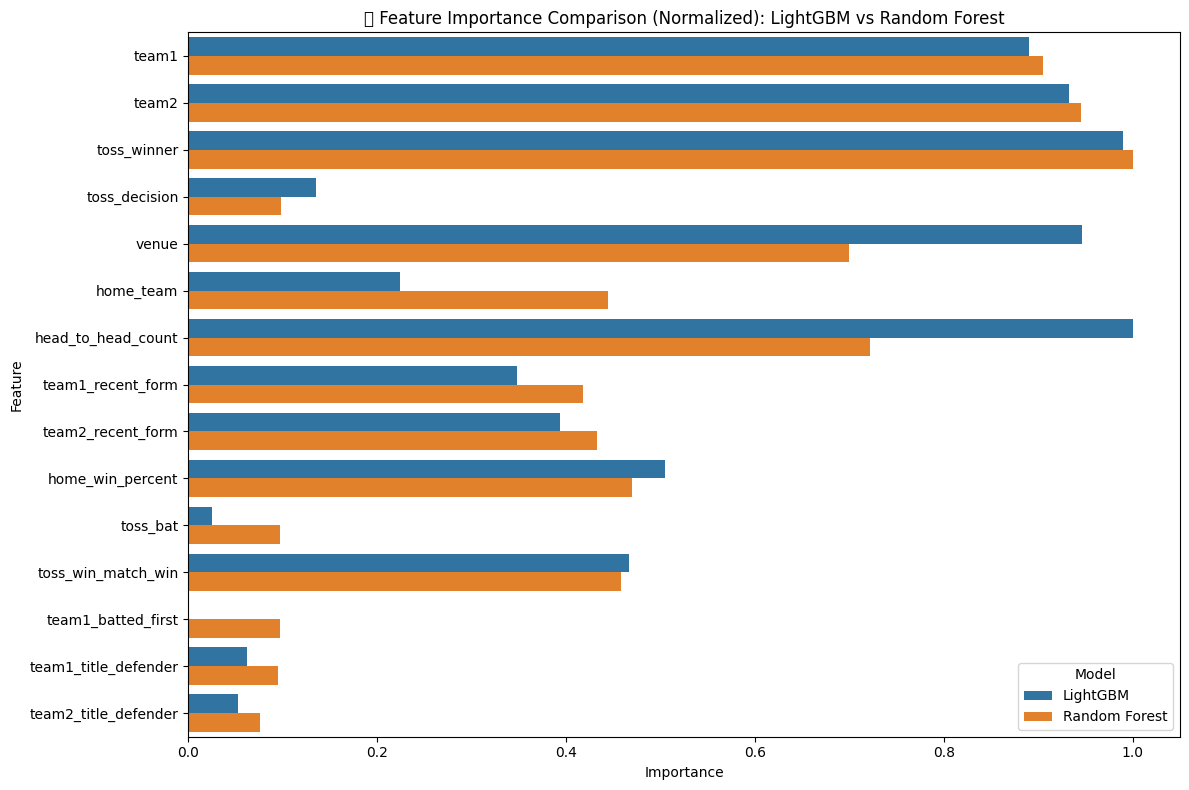

In [24]:
# Step 1: Re-train both models to be sure
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Re-train Random Forest
rf_model_final = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_final.fit(X_train_final, y_train_final)

# Re-train LightGBM
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train_final, y_train_final)

# Step 2: Get feature importances
rf_importance = rf_model_final.feature_importances_
lgbm_importance = lgbm_model.feature_importances_

# Step 3: Normalize importances for fair comparison
rf_importance_normalized = rf_importance / np.max(rf_importance)
lgbm_importance_normalized = lgbm_importance / np.max(lgbm_importance)

# Step 4: Create DataFrame for plotting
feature_names = categorical_features + numeric_features

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'LightGBM': lgbm_importance_normalized,
    'Random Forest': rf_importance_normalized
})

# Melt for seaborn plotting
importance_melted = importance_df.melt(id_vars='Feature',
                                       var_name='Model',
                                       value_name='Importance')

# Step 5: Plot
plt.figure(figsize=(12, 8))
sns.barplot(data=importance_melted, x='Importance', y='Feature', hue='Model')
plt.title("📊 Feature Importance Comparison (Normalized): LightGBM vs Random Forest")
plt.tight_layout()
plt.show()


In [25]:
#!pip install catboost

In [26]:
#!pip install -U numpy
#!pip install -U catboost


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:37:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
<ipython-input-27-9a38ca71af5a>:40: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


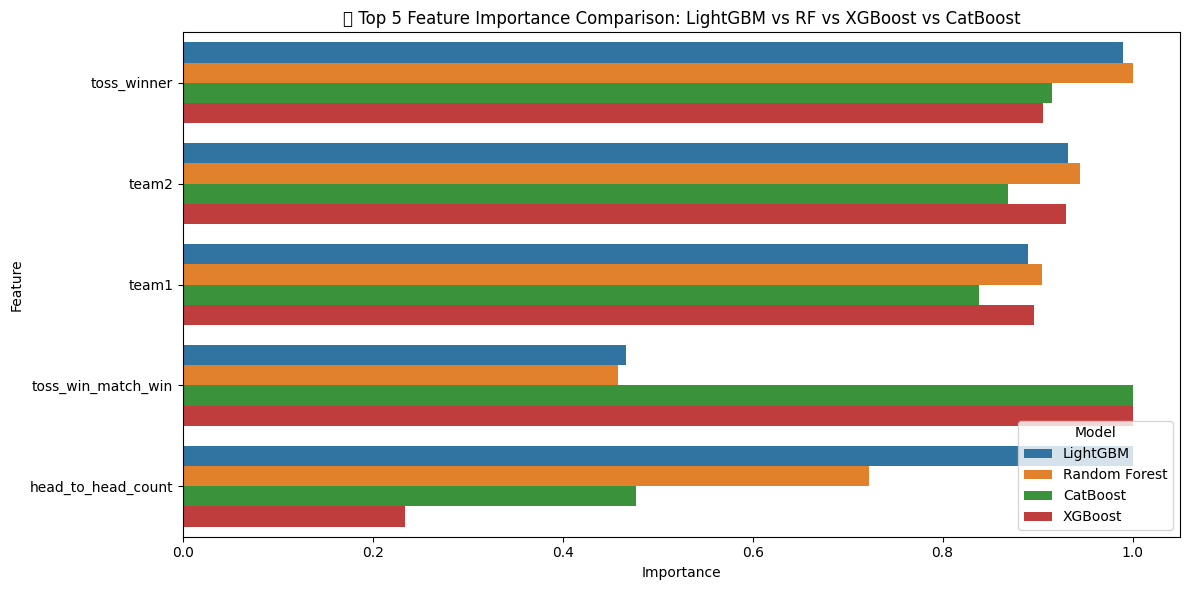

In [27]:
# Train and collect feature importances from CatBoost and XGBoost
from catboost import CatBoostClassifier
import xgboost as xgb

# Train CatBoost
catboost_model = CatBoostClassifier(verbose=0, random_state=42)
catboost_model.fit(X_train_final, y_train_final)
catboost_importance = catboost_model.get_feature_importance()

# Train XGBoost
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_final, y_train_final)
xgb_importance = xgb_model.feature_importances_

# Normalize all importances for comparison
def normalize(arr):
    return arr / np.max(arr)

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'LightGBM': normalize(lgbm_model.feature_importances_),
    'Random Forest': normalize(rf_model_final.feature_importances_),
    'CatBoost': normalize(catboost_importance),
    'XGBoost': normalize(xgb_importance)
})

# Melt and select top 5 features by average importance
importance_df['avg_importance'] = importance_df.drop('Feature', axis=1).mean(axis=1)
top5_features = importance_df.sort_values(by='avg_importance', ascending=False).head(5)

# Melt for seaborn plot
importance_melted_top5 = top5_features.drop(columns=['avg_importance']).melt(
    id_vars='Feature', var_name='Model', value_name='Importance'
)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=importance_melted_top5, x='Importance', y='Feature', hue='Model')
plt.title("🔥 Top 5 Feature Importance Comparison: LightGBM vs RF vs XGBoost vs CatBoost")
plt.tight_layout()
plt.show()

In [28]:
!mv /content/catboost_info /content/drive/MyDrive/Colab\ Notebooks/IPLPrediction/